In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = r'C:\Users\aleks\OneDrive\Робочий стіл\WAIT-people_analytics\DataCompetencySurvey.xlsx'
df = pd.read_excel(file_path, index_col=0)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Godzina rozpoczęcia  Godzina ukończenia Adres e-mail  Nazwa  \
ID                                                               
1  2024-03-05 15:25:52 2024-03-05 15:33:04    anonymous    NaN   
2  2024-03-05 15:29:46 2024-03-05 15:35:02    anonymous    NaN   
3  2024-03-05 15:16:30 2024-03-05 15:37:17    anonymous    NaN   
4  2024-03-05 15:34:17 2024-03-05 15:38:01    anonymous    NaN   
5  2024-03-05 15:34:26 2024-03-05 15:38:20    anonymous    NaN   

    Czas ostatniej modyfikacji  \
ID                               
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
5                          NaN   

   Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
ID                                                                                                       
1   Projekt "data" będący mobilną stacją benzynową...                                 

In [44]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.rename(columns = {"Area: Classical ML (Clustering, Regression, Classification)": "Area: Classical ML", "Nawiązywanie Relacji z Biznesem": "Naw. Rel. z Biznesem", "Nawiązywanie Relacji z naukowcami": "Naw. Rel. z  naukowcami"})

C:\Users\aleks\AppData\Local\Temp\ipykernel_2300\3749140906.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  classified_matrix = corr_matrix.applymap(classify_correlation)


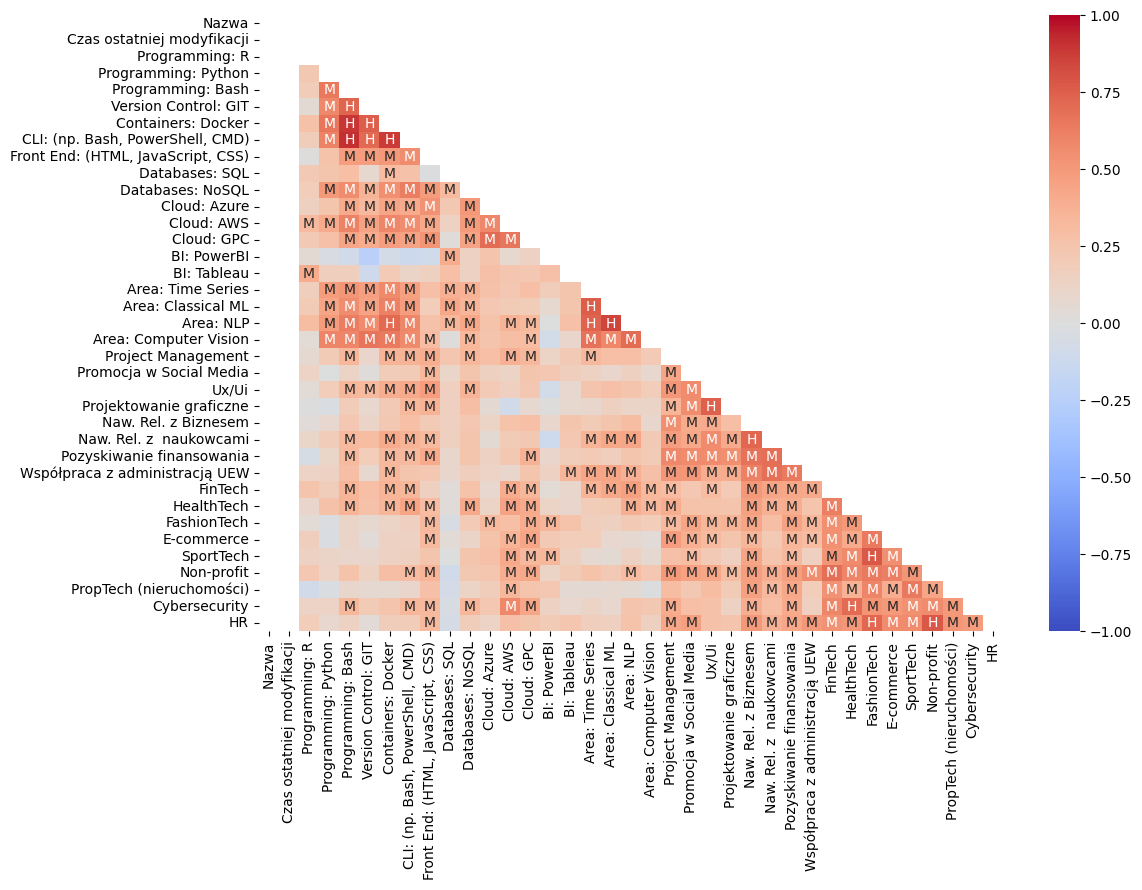

In [45]:
corr_matrix = numeric_df.corr()
#Absolute value higher than 0.7 is high correlated value | between 0.3 and 0.7 is medium correlated | less than 0.3 is low correlated
def classify_correlation(corr_value):
    if abs(corr_value) >= 0.7: 
        return 'H'
    elif abs(corr_value) >= 0.3:
        return 'M'
    else:
        return ''

classified_matrix = corr_matrix.applymap(classify_correlation)

plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=classified_matrix,fmt='', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()